# PISA Data Exploration

## Preliminary Wrangling <br/>
The data consists of 485490 rows contain information about 15-year-old school pupils' scholastic performance on mathematics, science, and reading and various other information them like siblings, no of parents etc.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

In [2]:
# Read dataset 
df = pd.read_csv('pisa2012.csv', encoding='latin-1')
warnings.filterwarnings('ignore')

C:\Users\kaushal.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


## What is the structure of your dataset?
There are 485490 rows in the dataset with 636 features (truancy, siblings, family, late to school, science scores, math scores etc). 

## What is/are the main feature(s) of interest in your dataset?


To start the analysis I wanted to investigate the the % of students who are Late for School". It would be interesting to know whether the number of parents at home effects being late to school and scores. It is generally that those who are good at science are good at math and vice versa but it would be interesting to know that those who are good at maths and science are good at reading too.

## Univariate Analysis

To begin with I wanted to investigate the variable (ST08Q01) "Late for School". It has options such as "None" which represents a student has never been late for school, "One or Two Times", "Three or Four Times" and "Five Times or More".

In [4]:
#Getting value counts of each category
df['ST08Q01'].value_counts()

None                     306065
One or two times         124380
Three or four times       29817
Five or more times        18881
Name: ST08Q01, dtype: int64

In [5]:
# Create index
df['ST08Q01'].value_counts().index

Index(['None  ', 'One or two times  ', 'Three or four times  ',
       'Five or more times  '],
      dtype='object')

In [6]:
# Count null values
df['ST09Q01'].isnull().sum();

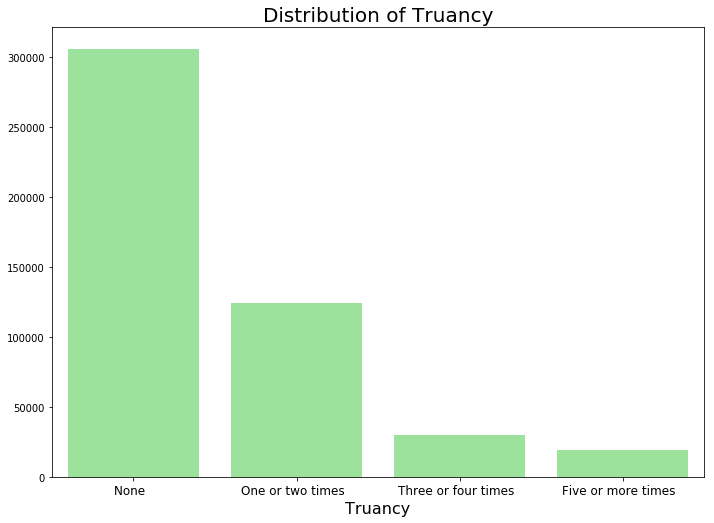

In [7]:
# Plot the figure
plt.figure(figsize=[ 11.69, 8.27])
# Add a countplot to the figure
sb.countplot(data = df, x = 'ST08Q01', order = df['ST08Q01'].value_counts().index,
            color = 'lightgreen', )
# Add x label
plt.xlabel('Truancy', fontsize = 16)
# Add y label
plt.ylabel('')
# Increase the fontsize of the xticks
plt.xticks(fontsize=12)
# Plot the title
plt.title('Distribution of Truancy', fontsize = 20);



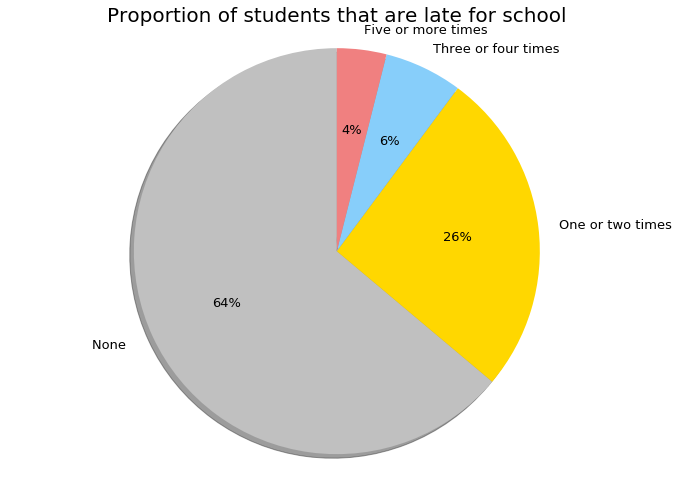

In [8]:
#Plot pie chart showing the percentages
labels = df['ST08Q01'].value_counts().index
# Add the sizes of the wedges
sizes = df['ST08Q01'].value_counts()
# Set the colours to be used
colors = ['silver', 'gold', 'lightskyblue', 'lightcoral']
# Decide to which wedge to explode (in this case I decied not to explode any)
explode = (0.0, 0.0, 0.0, 0.0)  
# Set the fontsize to 13 for all parameters
plt.rcParams['font.size'] = 13.0
# Set the figure size
plt.figure(figsize=[ 11.69, 8.27])
# Plot the title
plt.title('Proportion of students that are late for school', fontsize = 20)
# Add all predefined variables to pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90) # Too much shadow can misinterpret wedge sizes but in this case we have
# values written on
plt.axis('equal')
plt.show();

**Analysis:**
We can see that most children, almost two thirds, have never been late to school. Roughly a quarter of children have been late one of two times and 10 percent of children have been late more than twice.

The second variable of interest, the amount of parents at home, was calculated by mapping the boolean expressions (Yes or No) in columns "At Home - Mother" and "At Home - Father" into 1's and 0's then summing the columns into a engineered column "Parents_At_Home". The 3 possible values in the new engineered column were either 0, 1 or 2.

In [9]:
# Answers for ST11Q01
df['ST11Q01'].value_counts()

Yes    433007
No      27552
Name: ST11Q01, dtype: int64

In [10]:
# Amount of null values in ST11Q01
df['ST11Q01'].isnull().sum()

24931

In [11]:
# Answers for ST11Q02
df['ST11Q02'].value_counts()

Yes    372161
No      68875
Name: ST11Q02, dtype: int64

In [12]:
# Amount of null values in ST11Q02
df['ST11Q02'].isnull().sum()

44454

In [13]:
# Dropping all null values in both columns
df_q2 = df.dropna(subset=['ST11Q02', 'ST11Q01'])

In [14]:
# Checking there's no null values left
df_q2['ST11Q01'].isnull().sum()

0

In [15]:
# Map Yes and No into integer values
df_q2['ST11Q01'] = pd.Series(np.where(df_q2.ST11Q01.values == 'Yes', 1, 0),
                        df_q2.index)
warnings.filterwarnings('ignore')

In [16]:
# Map Yes and No into integer values
df_q2['ST11Q02'] = pd.Series(np.where(df_q2.ST11Q02.values == 'Yes', 1, 0),
                        df_q2.index)
warnings.filterwarnings('ignore')

In [17]:
# Engineer new column 
df_q2['parents_at_home'] = df_q2['ST11Q01'] + df_q2['ST11Q02']
warnings.filterwarnings('ignore')

In [18]:
# Check new column values
df_q2.head(1)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,parents_at_home
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,2


In [19]:
df_q2['parents_at_home'].value_counts()

2    360003
1     58264
0     18633
Name: parents_at_home, dtype: int64

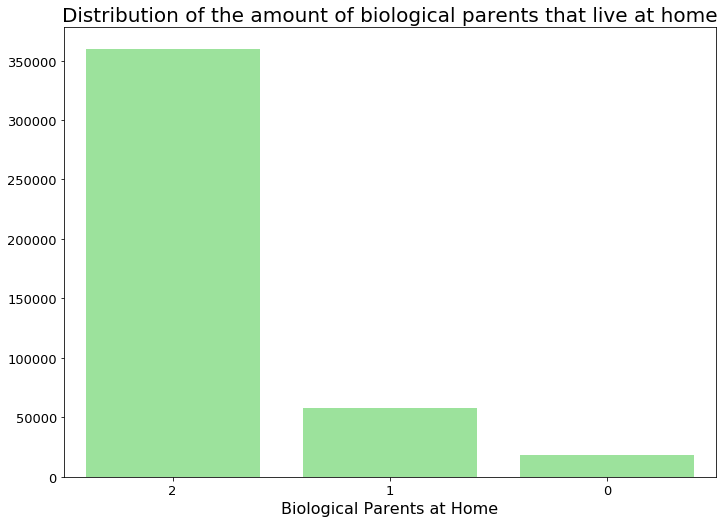

In [20]:
# Plot bar chart showing the amount of parents at home each child has
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data = df_q2, x = 'parents_at_home', order = df_q2['parents_at_home'].value_counts().index, color = 'lightgreen')

plt.xlabel('Biological Parents at Home', fontsize = 16)
plt.ylabel('')
plt.title('Distribution of the amount of biological parents that live at home', fontsize = 20);

Analysis:
From the graph we can clearly see that the majority of students have both biological parents living at home. A much smaller amount of students have 1 biological parent living at home and having 0 biological parents at home is the least common. It would be more beneficial to see these as percentages though.

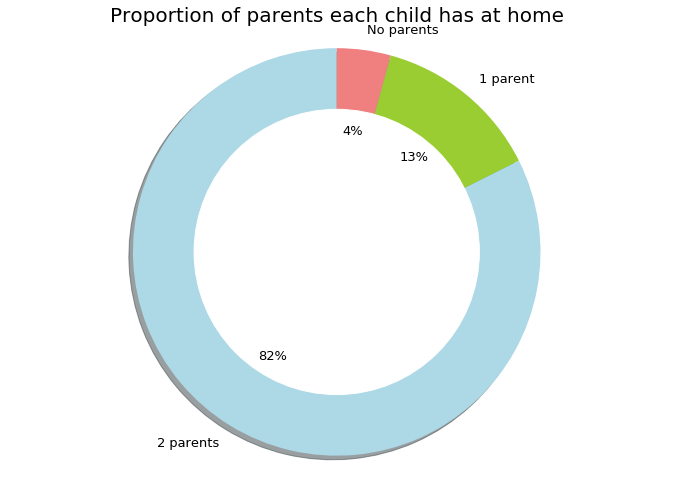

In [23]:
# Create labels for pie chart
labels = '2 parents', '1 parent', 'No parents'
# Determine sizes of the wedges
sizes = df_q2['parents_at_home'].value_counts()
# Set colours for chart
colors = ['lightblue', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Explode a certain wedge (in this case I did not decide to explode any wedge)
explode = (0.0, 0.0, 0.0)  
# Add an empty circle to the plot to turn pie chart into a donut
my_circle=plt.Circle( (0,0), 0.7, color='white') 


# Plot figure
plt.figure(figsize=[ 11.69, 8.27])
# Add empty cirlce to chart
p=plt.gcf()
p.gca().add_artist(my_circle)
# Add title
plt.title('Proportion of parents each child has at home', fontsize = 20)
# Add pie chart with previously determined varibales
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90, )

plt.axis('equal')
plt.show();

We can now see that over 80% of children have both biological parents at home and around twenty percent  have no or 1 biological parents at home.
Now that we have taken a look at the first two nominal variables let's take a look at what amount of children have siblings.

In [25]:
siblings = []

for i in range(df.shape[0]):
    if df['ST11Q03'][i] == "Yes":
        siblings.append(1)
    elif df['ST11Q04'][i] == "Yes":
        siblings.append(1)
    else: 
        siblings.append(0)

In [26]:
# Add siblings list to dataframe
df['siblings'] = siblings

In [27]:
siblings = ['1']
nosiblings = ['0']
df_w_siblings = df.loc[df['siblings'].isin(siblings)]
df_wo_siblings = df.loc[df['siblings'].isin(nosiblings)]

In [28]:
# View counts of values
df['siblings'].value_counts()

1    357633
0    127857
Name: siblings, dtype: int64

In [29]:
# Calculate percentages of values in column
sibling_percentages = df['siblings'].value_counts().div(len(df['siblings']))
sibling_percentages

1    0.736643
0    0.263357
Name: siblings, dtype: float64

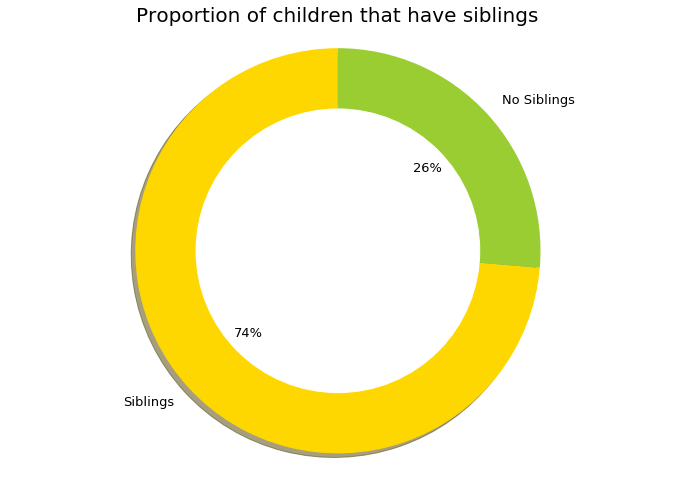

In [30]:
# Assign variables for pie chart
labels = 'Siblings', 'No Siblings',
sizes = df['siblings'].value_counts()
colors = ['gold', 'yellowgreen']
explode = (0.0, 0.0)  

# Create empty circle 
my_circle=plt.Circle( (0,0), 0.7, color='white') 

# Create Figure
plt.figure(figsize=[ 11.69, 8.27])

# Add white circle on top of figure
p=plt.gcf()
p.gca().add_artist(my_circle)

# Plot Pie Chart using assigned variables
plt.title('Proportion of children that have siblings', fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90, )

plt.axis('equal')
plt.show();

Almost three-fourth of the children have siblings. Rest of them are the only child.

## Bivariate Analysis

Does having more biological parents at home increase a childs chances of not being late?

In [31]:
# Create subsets of parents at home column
bar0_subset = df_q2.query('parents_at_home == 0')
bar1_subset = df_q2.query('parents_at_home == 1')
bar2_subset = df_q2.query('parents_at_home == 2')

In [32]:
# Drop all non values in tardiness column in each dataset
bar0_subset = bar0_subset.dropna(subset=['ST08Q01'])
bar1_subset = bar1_subset.dropna(subset=['ST08Q01'])
bar2_subset = bar2_subset.dropna(subset=['ST08Q01'])

In [33]:
# Calculate percentages of values in subset
bar0_percentages = bar0_subset['ST08Q01'].value_counts().div(len(bar0_subset['ST08Q01']))

In [34]:
# Calculate percentages of values in subset
bar1_percentages = bar1_subset['ST08Q01'].value_counts().div(len(bar1_subset['ST08Q01']))



In [36]:

# Calculate percentages of values in subset
bar2_percentages = bar2_subset['ST08Q01'].value_counts().div(len(bar2_subset['ST08Q01']))


In [37]:
# Concatenate calculated percentages to form new dataframe
bar_percentages = pd.concat([bar0_percentages, bar1_percentages, bar2_percentages], axis=1, sort=False)
bar_percentages.columns = ['0_parents', '1_parent', '2_parents']
bar_percentages

,0_parents,1_parent,2_parents
None,0.596782,0.584415,0.660536
One or two times,0.280978,0.285872,0.249139
Three or four times,0.069381,0.078476,0.056319
Five or more times,0.052859,0.051237,0.034006


In [38]:
# Check that columns add up to 1
bar_percentages['2_parents'].sum(), bar_percentages['0_parents'].sum(), bar_percentages['1_parent'].sum()

(1.0, 1.0, 1.0)

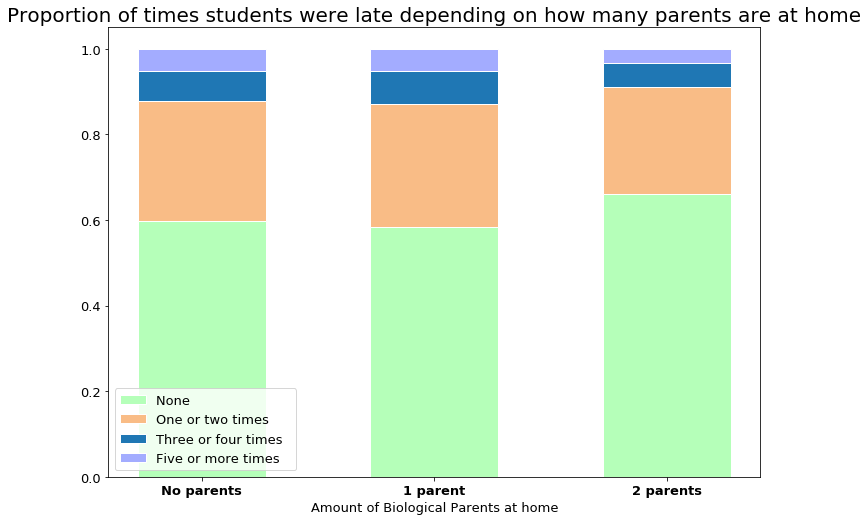

In [39]:
# Create Figure
plt.figure(figsize=[ 11.69, 8.27])
# Create bars
r = [0,1,2]
# Create starting bar location
bars_1 = np.add(bar_percentages.iloc[0], bar_percentages.iloc[1]).tolist()
bars_2 = np.add(bar_percentages.iloc[2], bars_1).tolist()
# Names of columns
names = ['No parents','1 parent','2 parents']
barWidth = 0.55
# Create green Bars
plt.bar(r, bar_percentages.iloc[0], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar_percentages.iloc[1], bottom=bar_percentages.iloc[0], color='#f9bc86', edgecolor='white', width=barWidth)
# Create dark blue Bars
plt.bar(r, bar_percentages.iloc[2], bottom=bars_1, edgecolor='white', width=barWidth)
# Create purple Bars
plt.bar(r, bar_percentages.iloc[3], bottom=bars_2, color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.legend(bar_percentages.index)
plt.title('Proportion of times students were late depending on how many parents are at home', fontsize=20)
plt.xlabel('Amount of Biological Parents at home')
# Show graphic
plt.show();

**Analysis:**
Children having both parents at home had the best truancy rate. Above 60% of children, with both biological parents at home, have never been late to school. Children of single parents had the worst truancy rate with more than 40% being late at least once. Children with no biological parents at home had a very similar truancy distribution to those with single parents.
Children with both parents at home also had the least amount of children that were late 5 or more times.
Now we have explored the idea of if children with both biological parents are more susceptible to being tardy. Do children with both parents at home have better scores in maths, reading and science?

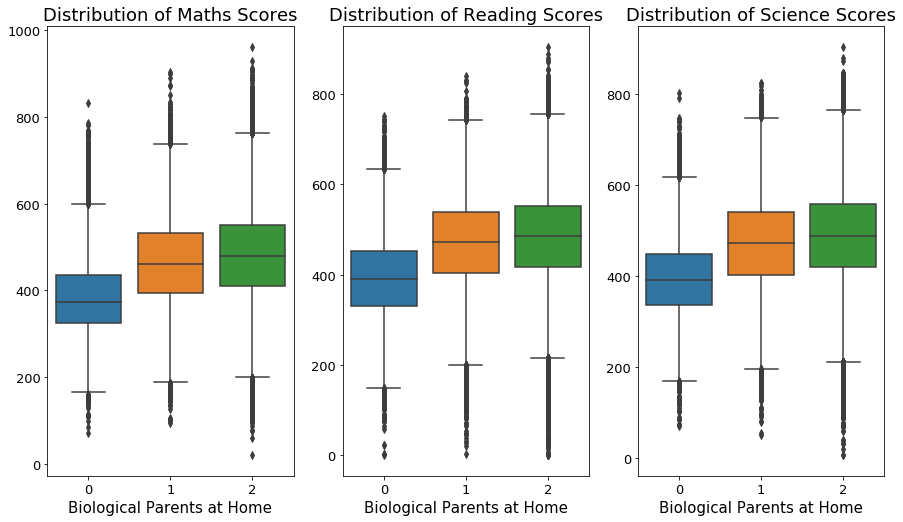

In [40]:
# Create figure 
plt.figure(figsize=[15, 8.27])
# Set color
base_color = sb.color_palette()[0];

# left plot: box plot of maths score
plt.subplot(1, 3, 1)
# Choose data
ax = sb.boxplot(x='parents_at_home', y='PV1MATH', data=df_q2)
# Set x label
plt.xlabel('Biological Parents at Home', fontsize=15)
# Remove y label
plt.ylabel('')
# Set title
plt.title('Distribution of Maths Scores', fontsize=18);

# middle plot: box plot of reading scores
plt.subplot(1, 3, 2)
ax = sb.boxplot(x='parents_at_home', y='PV1READ', data=df_q2)
plt.xlabel('Biological Parents at Home', fontsize=15)
plt.ylabel('')
plt.title('Distribution of Reading Scores', fontsize=18);

# right plot: box plot of science scores
plt.subplot(1, 3, 3)
ax = sb.boxplot(x='parents_at_home', y='PV1SCIE', data=df_q2)
plt.xlabel('Biological Parents at Home', fontsize=15)
plt.ylabel('')
plt.title('Distribution of Science Scores', fontsize=18);

From the three box plots we can see that having 2 biological parents at home has a positive affect on the average scores for mathematics (PV1MATH), science (PV1SCIE) and reading (PV1READ). Children not having any biological parents had the lowest mean scores for all subjects but also these children, with no biological parents at home, had the smallest range of values. On the contrary, parents with both biological parents at home had the largest range of values.
.

Next I tried to figure out relation between math scores and reading scores

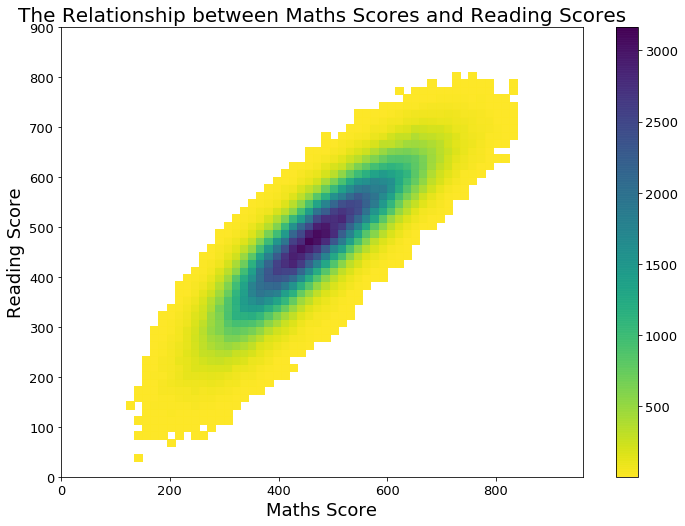

In [42]:
# Create bins for each varibale
bin_PV1MATH = np.arange(0, df['PV1MATH'].max(), 15)
bin_PV2READ   = np.arange(0, df['PV1READ'].max(), 15)

# Create figure
plt.figure(figsize=[ 11.69, 8.27])
# Create heat map for each variable using bins
h2d = plt.hist2d(data = df, x = 'PV1MATH', y = 'PV1READ', 
          bins = [bin_PV1MATH, bin_PV2READ], cmap = 'viridis_r', cmin = 5, alpha = 0.99)
# Plot x label
plt.xlabel('Maths Score', fontsize=18)
# Plot y label
plt.ylabel('Reading Score', fontsize=18)
# Plot title
plt.title('The Relationship between Maths Scores and Reading Scores', fontsize=20)
# Plot colour bar
plt.colorbar();

There is a strong positive relationship between mathematical ability and reading ability. The majority of scores, represented by the darker area of the graph, lies very centrally in the distribution with mathematic scores between 400 and 600 and similar reading scores. At the top end of the major part of the spectrum there are children with maths and reading scores of 800.

## Multivariate Analysis

From our last visualisation we saw that there's a strong correlation between maths and reading scores and that the most popular scores for both variables were between 400 and 600 but what happens if we introduce a third nominal variable such as the amount of parents at home?

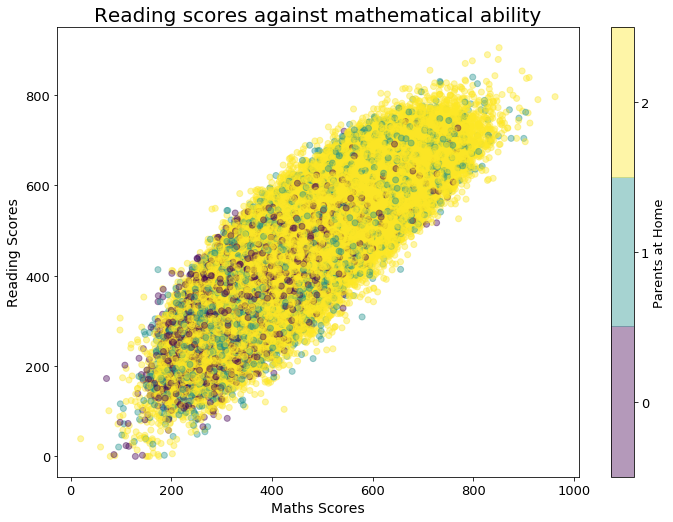

In [43]:
# Create figure
plt.figure(figsize=[ 11.69, 8.27])
# Plot scatter using data
plt.scatter(data = df_q2, x = 'PV1MATH', y = 'PV1READ', c = 'parents_at_home', cmap=plt.cm.get_cmap('viridis', 3), alpha = 0.4)
# Plot the title
plt.title('Reading scores against mathematical ability', fontsize=20)
# Plot y label
plt.ylabel('Reading Scores', fontsize=14)
# Plot x label
plt.xlabel('Maths Scores', fontsize=14)
# Create colour legend
plt.colorbar(ticks=range(3), label='Parents at Home')
# Set limits of ticks on colour bar
plt.clim(-0.5, 2.5);



**Analysis:**
Adding in the amount of parents at home as a colour dependent variable shows that the children with no biological parents at home, represented by the darker circles, appear to clump in the bottom left portion of the distribution which corresponds to lower readings and mathematics scores. The top end of the spectrum is made up mainly children with two parents.

Also it would be interesting to know if  all 3 subjects related to each other?

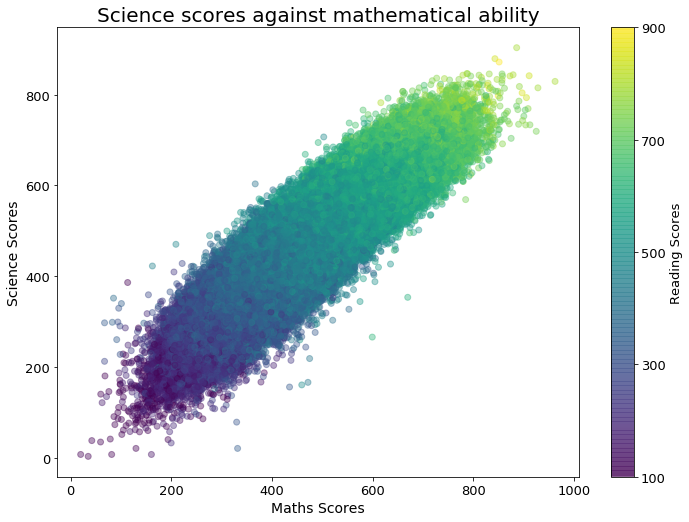

In [45]:
# Create figure
plt.figure(figsize=[ 11.69, 8.27])
# Plot scatter using data
plt.scatter(data = df, x = 'PV1MATH', c = 'PV1READ', y = 'PV1SCIE', cmap=plt.cm.get_cmap('viridis', 1000), alpha = 0.4)
# Plot the title
plt.title('Science scores against mathematical ability', fontsize=20)
# Plot y label
plt.ylabel('Science Scores', fontsize=14)
# Plot x label
plt.xlabel('Maths Scores', fontsize=14)
# Create colour legend
plt.colorbar(ticks=range(100, 901, 200), label='Reading Scores')
# Set limits of ticks on colour bar
plt.clim(100, 900);



In [ ]:
As expected we can see that all of the 3 core subjects are related. If a student has a strong maths and science score for example, then they will probably have a high reading score too.

## Conclusion 

From the visualisation you can see the strong relationship between the 3 variables science, maths and reading.
What we've learned during this project, is having both biological parents is beneficial to be on time and scoring high marks
